<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week13_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~4_pg_50~95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 03 케라스(Keras)**

## **01. 딥러닝 준비**
---

>케라스의 본래 목적: 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어주는 것.<br/>
직관적이고 사용자 친화적 --> 코딩의 난이도가 어렵지 않음<br/>
하지만 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야 한다는 한계점 존재.

### **1-1 주요 용어**
---

#### **1-1-1 하이퍼파라미터(hyper-parameter)**

>하이퍼 파라미터: 모델 훈련 시 사용자가 직접 설정해주는 설정 값.
* 값에 따라 모델의 성능 및 결과가 달라져 매우 중요.

#### **1-1-2 과소적합 vs 과대적합**

> 데이터: 훈련용 데이터 vs 예측용 데이터
* 훈련용 데이터(train set): 머신러닝 모델이 학습할 데이터.
* 예측용 데이터(test set): 모델이 예측해야 할 정답 레이블이 없는 데이터

>학습할 데이터가 특정 레이블에 편향된 데이터로 이루어져 있을 경우 예측 성능이 현저히 떨어짐
* 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어짐
* 과대적합: 학습 데이터를 지나치게 반복 학습하여 과하게 적합된 상태.<br/>
훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 예측 오차 발생 확률 증가.<br/>
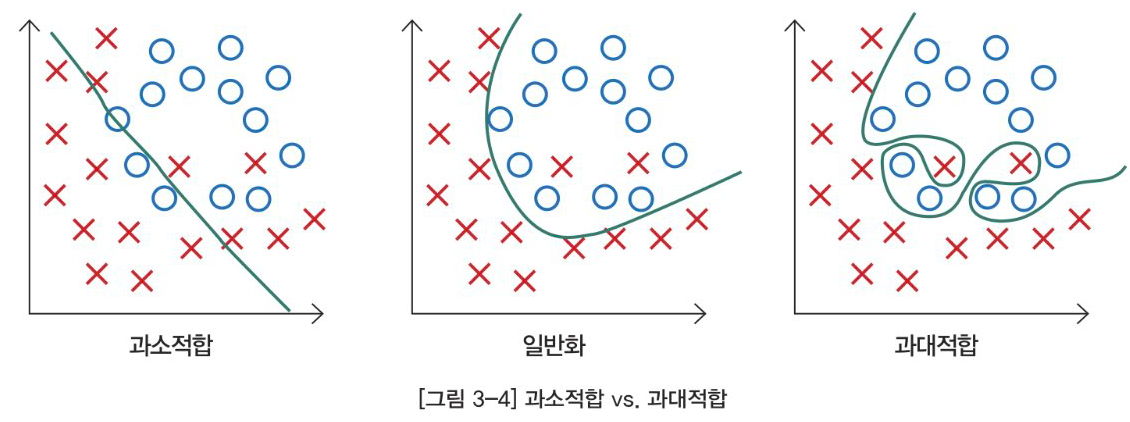

#### **1-1-3 에포크(epoch)**

> 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)를 1 epoch(에포크)라 함.

#### **1-1-4 손실함수(loss function)**

>손실함수: 예측값과 정답값의 차이 또는 오차(Error)<br/>
분류나 회귀 모델에 따라 손실함수를 사용자가 다르게 적용

>지도학습(supervised learning)의 **분류** 문제: 이진 분류(binary classification) vs 다중 분류(multi-class classification)
* **이진 분류**- 손실함수: 'binary crossentropy' 사용, 출력층의 활성화 함수: sigmoid 사용
* **다중 분류**- 손실함수: 'categorical_crossentropy' 사용, 출령층의 활성함수: 'softmax' 사용,<br/>
 다중 분류의 대상이 되는 클래스가 원핫벡터(one-hot vector)인 경우 사용
* 정답 클래스가 레이블 인코딩되어 있을 경우 'sparse_categorical_crossentropy' 손실함수 사용.

> **회귀** 모델의 경우 평균제곱오차(Mean Squared Error), 평균절대값오차(Mean Absolute Error), 후버(Huber) 등이 사용됨

텐서플로는 사전 정의된 손실함수를 함수형(Functional API)과 클래스형(Subclassing)으로 제공.<br/> 일반적으로 많이 사용되는 손실함수 목록:<br/>
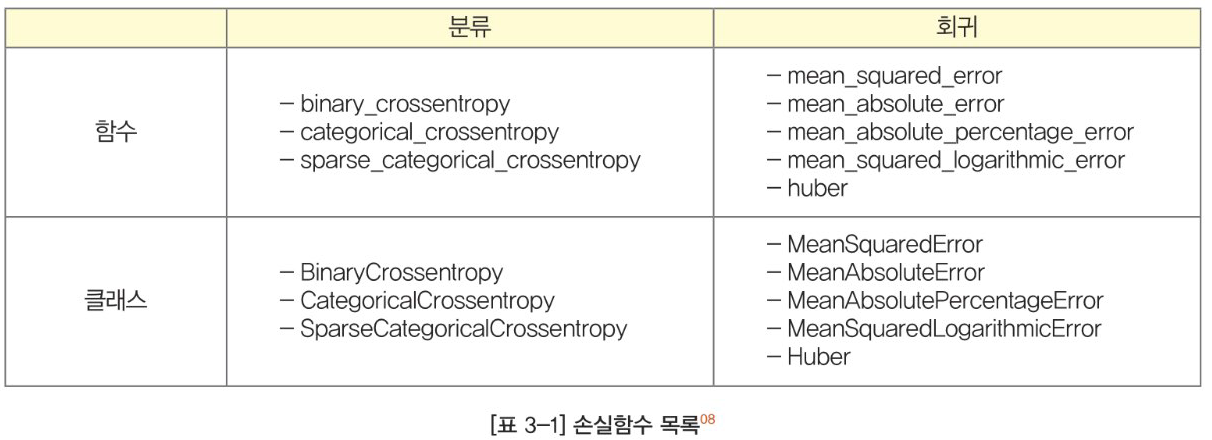

In [3]:
# 다음과 같이 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

#### **1-1-5 경사하강법(gradient descent)**

>경사하강법: 딥러닝 모델 훈련 시 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법<br/>
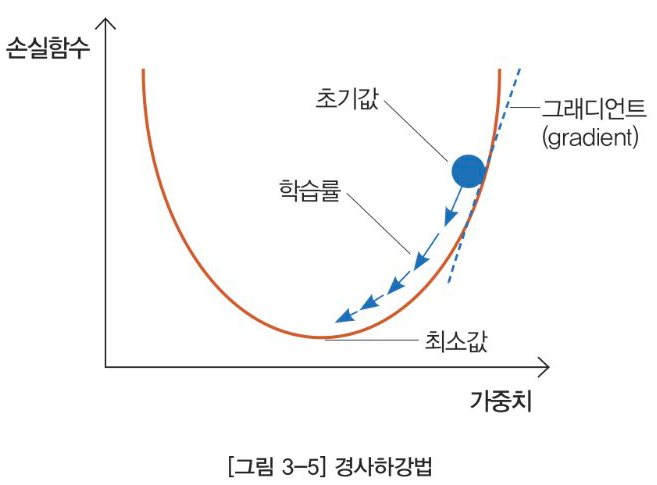

>* 경사하강법 알고리즘을 딥러닝 훈련 프로세스에 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있음.
* 손실함수(Loss Function) 혹은 목적 함수를 다음과 같이 정의<br/>
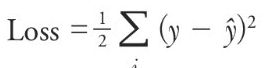<br/>
* 다음의 단순 선형회귀 수식이 주어졌을 떄, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현 [y = wx + b]

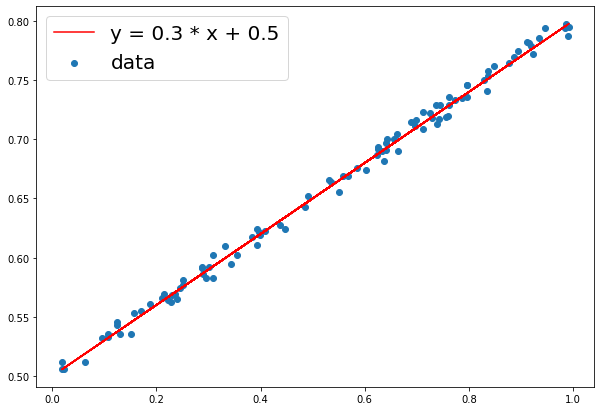

w: 0.3, b: 0.5


In [5]:
# 넘파이로 구현
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 생성
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x +  b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y = {w} * x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

> y 데이터는 y = 0.3x + 0.5 식과 완벽히 일치하지 않고 약간의 노이즈가 추가됨<br/>
이제 경사하강법 알고리즘의 핵심인 w,b에 대한 그래디언트를 구하는 부분만 구현하면 됨.<br/>
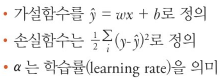<br/>
* 손실함수를 w에 대한 편도함수를 유도<br/>
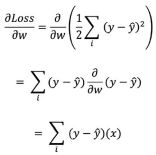<br/>
* 가중치 변화량인 그래디언트는 가중치 w 에 대한 편도함수 의미. 다음과 같이 정의됨.<br/>
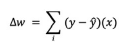<br/>
* 그래디언트 w 업데이트 최종 수식:<br/>
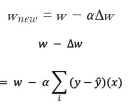

* 그래디언트 w를 구했듯이 똑같은 방식으로 그래디언트 b를 구할 수 있음<br/>
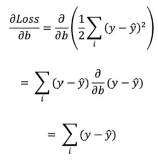<br/>
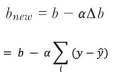

In [11]:
# 넘파이로 최적화 과정 구현
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0,high=1.0)
b = np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat - y) ** 2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y) * x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f},b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f},b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.62005,b = 0.23424 error = 3.45188
 5 w = 0.60624,b = 0.32645 error = 0.39346
10 w = 0.56343,b = 0.35120 error = 0.29083
15 w = 0.52649,b = 0.37218 error = 0.21512
20 w = 0.49475,b = 0.39021 error = 0.15923
25 w = 0.46747,b = 0.40569 error = 0.11796
30 w = 0.44404,b = 0.41900 error = 0.08750
35 w = 0.42390,b = 0.43044 error = 0.06500
40 w = 0.40660,b = 0.44026 error = 0.04840
45 w = 0.39173,b = 0.44871 error = 0.03614
50 w = 0.37896,b = 0.45596 error = 0.02709
55 w = 0.36799,b = 0.46219 error = 0.02041
60 w = 0.35856,b = 0.46755 error = 0.01548
65 w = 0.35046,b = 0.47215 error = 0.01184
70 w = 0.34349,b = 0.47610 error = 0.00915
75 w = 0.33751,b = 0.47950 error = 0.00716
80 w = 0.33237,b = 0.48242 error = 0.00570
------------------------------------------------------------
84 w = 0.32964,b = 0.48397 error = 0.00481


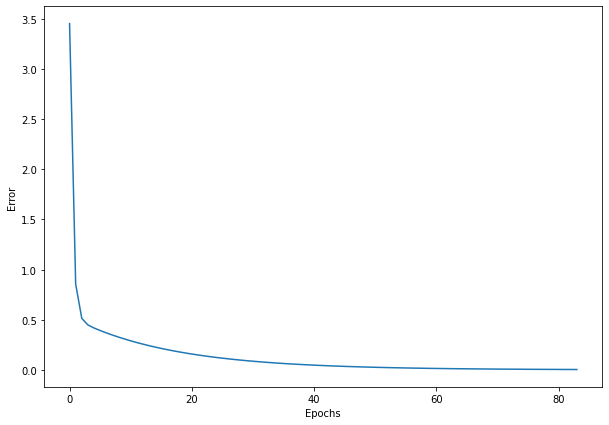

In [12]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### **1-2 딥러닝 프로세스**
---

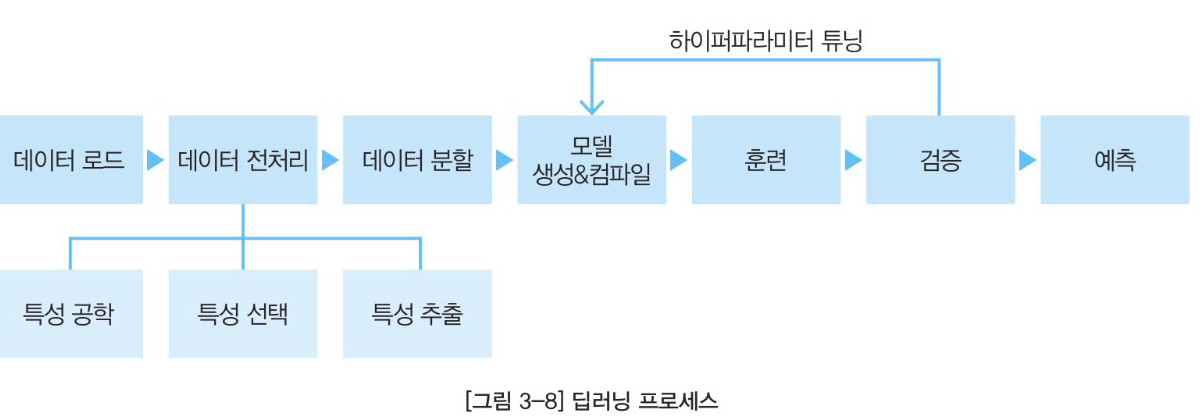

## **02 단순 신경망 훈련**
---

### **2-1 선형회귀**
---

>회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법.<br/>
단순선형회귀(simple linear regression) 모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음<br/>
앞으로 1차 함수식은 y=wx + b 로 정의.

### **2-1 뉴런(Neuron)**
---

>* 뉴런은 인공 신경망 모델을 구성하는 하나의 신경 의미.
* 뉴런은 노드(node)라고도 불림
* 신경망은 여러 개의 레이어(layer)를 가지며 하나의 레이어는 1개 이상의 뉴런으로 구성됨.
* 뉴런의 내부에는 가중치가 존재하며 모델이 훈련을 진행하며 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨

### **2-3 Dense 레이어**
---

>* Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어
* 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있어 완전 연결층(Full Connected Layer)라고 부르기도 함

>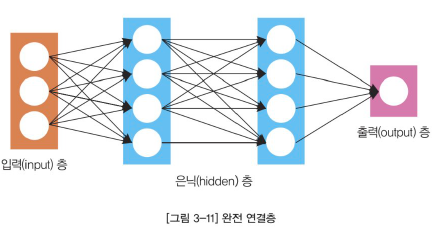
* 위 그림은 4개의 Dense 레이어로 구성된 모델을 나타냄
* 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성되어 있음
* 각 레이어는 1개 이상의 뉴런으로 구성됨
* 입력 레이어는 3개의 뉴런이 있고, 출력 레이어는 1개의 뉴런을 가짐
* 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어 완전연결층이라 정의

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# RELU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### **2-4 데이터셋 만들기**
---

In [13]:
# 단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 x,y 데이터 생성.
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


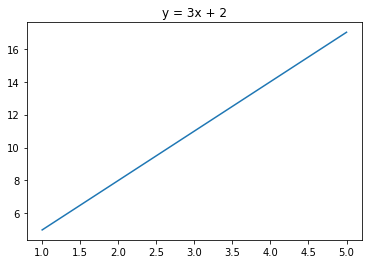

In [14]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### **2-5 Sequential API**
---

>텐서플로 케라스는 세 가지 방식으로 모델 생성 가능.<br/>
 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델 생성 가능<br/>
Sequential API 방식: 층을 이어 붙이든 시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 가짐.<br/>
입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하며 딥러닝 연산 수행.<br/>
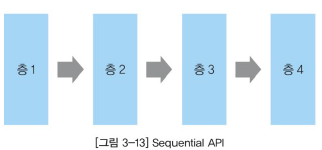

#### **2-5-1 모델 구조**

In [16]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [17]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### **입력 데이터 형태**

Sequential API를 사용하여 모델 구성 시 반드시 첫번째 층은 input_shape 매개변수를 지정해야함.

In [18]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

#### **2-5-3 단순선형회귀 모델 정의**

In [19]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### **2-6 모델 요약**
---

In [20]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### **2-7 컴파일**
---

>모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 그리고 평가지표(metrics) 등 정의.<br/>
옵티마이저, 손실함수, 평가지표는 3가지 방법으로 지정 가능. 클래스 인스턴스, 함수 혹은 사전 정의된 문자열.
>클래스 인스턴스로 지정할 경우 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터를 사용자가 지정 가능.<br/>
하지만 문자열로 지정할 경우 기본값으로 설정된 하이퍼파라미터를 사용하며, 하이퍼파라미터 수정은 어렵다는 한계 존재.

In [21]:
# 긴 문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [22]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

In [23]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

### **2-8 훈련**
---

In [25]:
# 훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 944ms/step - loss: 131.0355 - mae: 10.6891
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 76.4535 - mae: 8.2037
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 44.6451 - mae: 6.3063
Epoch 4/5
1/1 [==============================] - 0s 34ms/step - loss: 26.1082 - mae: 4.8577
Epoch 5/5
1/1 [==============================] - 0s 34ms/step - loss: 15.3052 - mae: 3.7517


* 매 epoch 당 loss 값을 보면 손실함수, 즉 모델의 예측 오차가 점점 줄어드는 것을 볼 수 있음
* 즉, 모델이 잘 학습되고 있는 것 확인
* 반복 훈련 횟수가 충분하지 않아 학습은 덜 됨.(과소적합 상태)

In [27]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 468ms/step - loss: 253.7600 - mae: 14.7521
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 147.9224 - mae: 11.2916
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 86.2452 - mae: 8.6498
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 50.3024 - mae: 6.6330
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 29.3565 - mae: 5.0933
Epoch 6/1200
1/1 [==============================] - 0s 12ms/step - loss: 17.1500 - mae: 3.9179
Epoch 7/1200
1/1 [==============================] - 0s 20ms/step - loss: 10.0363 - mae: 3.0204
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 5.8905 - mae: 2.3353
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.4743 - mae: 1.8121
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.0660 - mae: 1.4127
Epoch 11/1200
1/1 [==============================]

* mse, mae 모두 개선됨.

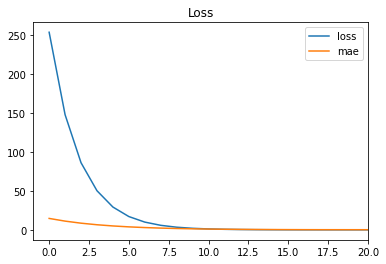

In [28]:
# 훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title("Loss")
plt.legend()
plt.show()

* 첫 10 epoch까지 손실이 급겹히 감소하는 것 확인.
* 즉, 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴.

### **2-9 검증**
---

In [29]:
model.evaluate(x,y)

1/1 [==============================] - 0s 338ms/step - loss: 3.1361e-05 - mae: 0.0048


[3.136094892397523e-05, 0.004806614015251398]

### **2-10 예측**
---

In [30]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 301ms/step


array([[32.02323]], dtype=float32)

## **03 심층 신경망으로 이미지 분류**
---

### **3-1 케라스 내장 데이터셋 로드**
---

>tensorflow.keras.datasets 서브패키지에 위치하는 데이터셋 목록:
* boston_housing: 보스톤 주택 가격 데이터셋(회귀)
* cifar10: CIFAR10 이미지 분류 데이터셋(분류)
* cifar100: CIFAR100 이미지 분류 데이터셋(분류)
* mnist: mnist 손글씨 데이터셋(분류)
* fashion_mnist: 의류 데이터셋(분류)
* imdb: IMDb 영화 데이터셋(분류)
* reuters: Reuters 뉴스 토픽(분류)

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [2]:
# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


*훈련세트:60000개의 데이터, 검증세트: 10000개의 데이터 저장됨.
* 배열의 shape: (데이터셋 크기,28,28) {28=이미지의 세로,가로 픽셀크기}

In [3]:
# 로드된 데이터셋 확인
print('train set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


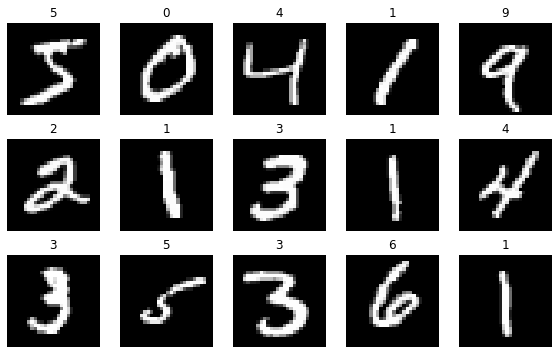

In [6]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5,i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### **3-2 데이터 전처리**
---

In [7]:
# x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 데이터가 0~255 범위의 값으로 이루어짐<br/>
--->데이터의 범위를 0~1 사이의 값을 가지도록 정규화

In [9]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 전] 최소값: 0.0, 최대값: 1.0


In [10]:
# test 세트에도 정규화 동일 적용
x_test = x_test/x_test.max()

### **3-3 Flatten 레이어**
---

>샘플 이미지의 형태는 (28,28)로 이루어져있고 2차원 입력 ---> Dense 레이어에 입력값으로 넣을 수 없음

In [11]:
# 1차원으로 데이터 전처리
x_train.reshape(60000,-1)
print(x_train.reshape(60000,-1).shape)

(60000, 784)


In [13]:
# Flatten 레이어 이용하여 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

Flatten 적용 후: (60000, 784)


### **3-4 활성화 함수**
---

>활성화 함수(Activation Function): 입력을 비선형 출력으로 변환해주는 함수. 선형관계를 나타내는 함수에 비선형성 추가.
* 자주 사용되는 활성화 함수: 시그모이드(Sigmoid),하이퍼볼릭 탄젠트, ReLU,Leaky ReLU

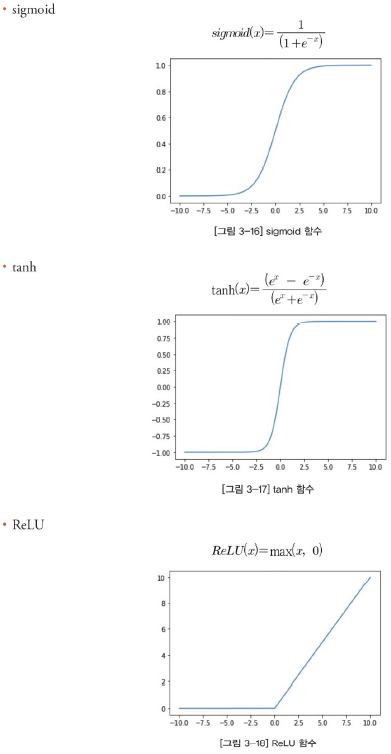
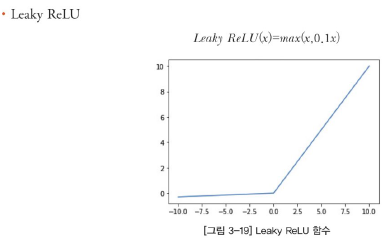

In [14]:
# Dense 레이어에 ReLU 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128,activation='relu')

In [15]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### **3-5 입력과 출력**
---

>분류 모델의 가장 마지막 레이어인 출력층으 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10,activation='softmax')
])

* Dense 레이어를 구성하는 노드의 개수를 256-64-32-10으로 조금씩 개수가 줄어드는 형태로 구성함
* 노드 개수를 조금씩 줄여가며 최종 출력 클래스 개수인 10개까지 정보 축약

In [ ]:
# 출력층 노드가 1개일 경우 sigmoid
tf.keras.layers.Dense(1,activation='sigmoid') #단,이진분류모델이라도 원핫인코딩했을 경우 softmax 함수 사용

# 출력층 노드가 2개 이상일 경우, softmax
tf.keras.layers.Dense(10,activation='softmax')

### **3-6 손실함수**
---

>분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련 가능.<br/>
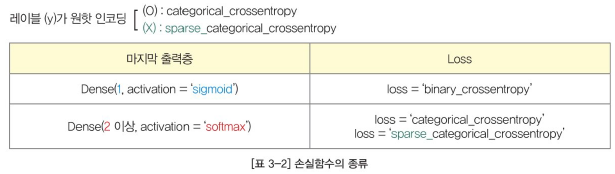

In [ ]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_Crossentropy')
# y가 원핫 벡터가 아닐 경우
model.compile(loss='sparse_categorical_crossentropy')

### **3-7 옵티마이저**
---

>옵티마이저(optimizer)는 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
* Adam(많이 사용됨),SGD,Adagrad,Nadam 등

In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### **3-8 평가지표**
---

In [17]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **3-9 훈련**
---

In [18]:
# 훈련
model.fit(x_train,y_train,
          #검증 세트 지정
          validation_data=(x_test,y_test),
          epochs=10
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2273 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.1348 - val_sparse_categorical_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0920 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0927 - val_sparse_categorical_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0770 - val_sparse_categorical_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0837 - val_sparse_categorical_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - spars

### **3-10 평가**
---

In [20]:
test_loss,test_acc = model.evaluate(x_test,y_test)

print('검증 세트 정확도:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9773
검증 세트 정확도: 0.9772999882698059


In [21]:
predictions = model.predict(x_test)
# 첫번째 입력 이미지에 대한 예측 결과 출력
predictions[0]

313/313 [==============================] - 1s 1ms/step


array([9.7649902e-11, 3.4674848e-08, 2.2017156e-07, 3.1728115e-07,
       1.7627782e-08, 4.8792553e-10, 9.7500624e-15, 9.9999481e-01,
       6.9429236e-09, 4.4735389e-06], dtype=float32)

In [22]:
import numpy as np

# 0번 index에 대한 예측 클래스
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


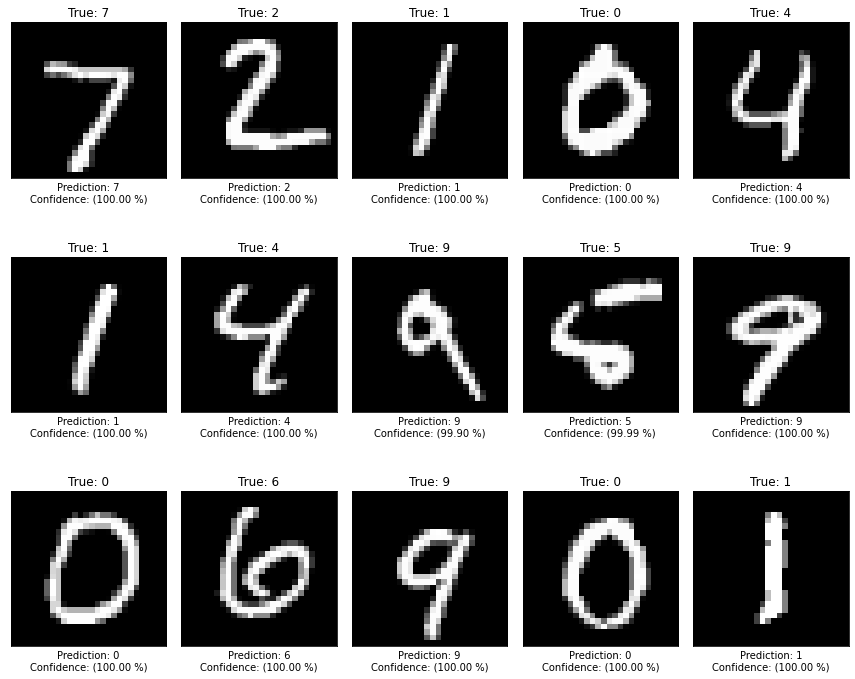

In [27]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence= x_test[idx],y_test[idx], np.argmax(predictions[idx]),100 * np.max(predictions[idx])
  return img,y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img,y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

## **04 모델 세부 설정**
---

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ',x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### **4-1 초기값 설정**
---

In [2]:
dense = tf.keras.layers.Dense(256,activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

* 기본값으로 설정된 GlorotUniform 초기화 방법 변경 위해서는 kernel_initializer 매개변수에 설정하면 됨(문자열 지정 or 클래스 인스턴스로 지정)

In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal',activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256,kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### **4-2 규제(Regularization)**
---

In [4]:
# 텐서플로 케라스 레이어는 기본값으로 규제 적용 안함
dense = tf.keras.layers.Dense(256,activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256,kernel_regularizer='l1',activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256,kernel_regularizer=regularizer,activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### **4-3 드롭아웃(Dropout)**
---

>딥러닝 모델의 가장 큰 난제가 과대적합.<br/>
모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향 존재.<br/>
드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어
* 노드의 일부 신호 임의로 삭제
* 훈련 시에만 적용되며, 예측 시점에는 모든 노드 활용<br/>
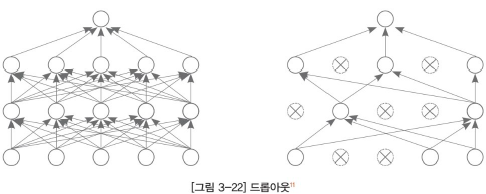

In [6]:
# Dropout 25% 비율 적용(25% 노드가 삭제됨)
tf.keras.layers.Dropout(0.25)

### **4-4 배치 정규화(Batch Normalization)**
---

>배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함.<br/>
다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련 가능하며 성능 크게 향상.

In [8]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10,activation='softmax'),
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

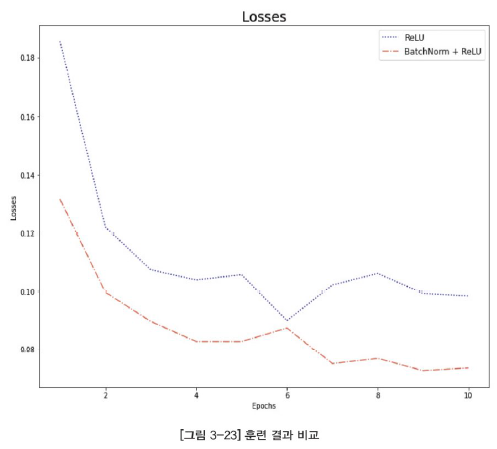

* 배치 정규화만 추가했는데 손실이 이전 대비 더 안정적이고 빠르게 수렴함.

### **4-5 활성화(activation) 함수**
---

In [11]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [12]:
# Model C: Dense + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10,activation='softmax'),
])
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

>앞에서 생성한 2개의 모델과 leakyReLU 활성화 함수로 변경한 모델까지 더해서 총 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 뒤 수렴 속도 확인
* model_a : Dense 레이어 + ReLU 활성화 함수
* model_b : Dense 레이어 + 배치 정규화
* model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0,2) 활성화 함수

In [13]:
model_a.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0,2)
history_c = model_c.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.9158 - val_loss: 0.1715 - val_accuracy: 0.9508
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1460 - accuracy: 0.9580 - val_loss: 0.1308 - val_accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1053 - accuracy: 0.9688 - val_loss: 0.1023 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.0964 - val_accuracy: 0.9709
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0944 - val_accuracy: 0.9728
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.0863 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0906 - val_accurac

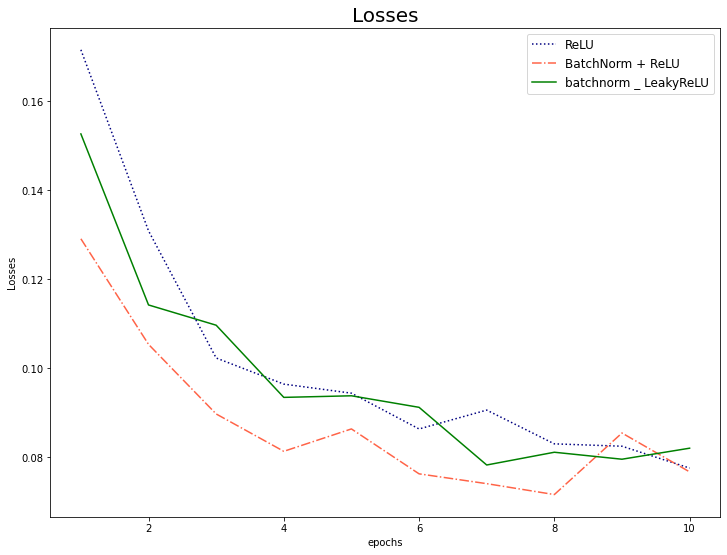

In [15]:
# epoch 별 검증 손실의 감소 추이 확인
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm + ReLU','batchnorm _ LeakyReLU'],fontsize=12)
plt.show()